In [275]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
!pwd

/content/drive/My Drive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [278]:
%cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [279]:
%cd MyDrive

[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [280]:
%cd Colab Notebooks

[Errno 2] No such file or directory: 'Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [281]:
%cd ML

[Errno 2] No such file or directory: 'ML'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [282]:
%cd Grooking-Machine-Learning/

[Errno 2] No such file or directory: 'Grooking-Machine-Learning/'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [283]:
%cd LinearRegression/

[Errno 2] No such file or directory: 'LinearRegression/'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [284]:
!ls

data  simpleLInearRegression.ipynb


In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import random
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(3)

In [286]:
file_path = 'data/tvmarketing.csv'

df = pd.read_csv(file_path)
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [287]:
X = df["TV"]
Y = df["Sales"]

X_np = X.to_numpy()
Y_np = Y.to_numpy()


In [288]:
sklearn_model = LR().fit(X_np.reshape((len(X_np),1)), Y_np)
sklearn_sales = sklearn_model.predict(X_np.reshape((len(X_np),1)))
sklearn_sales.shape
print(sklearn_model.coef_)
print(sklearn_model.intercept_)

[0.04753664]
7.032593549127695


In [289]:
prediction_df = pd.DataFrame({"TV":X_np,
                              "Sales":Y_np,
                              "Sk_Sales":sklearn_sales})

prediction_df

,TV,Sales,Sk_Sales
0,230.1,22.1,17.970775
1,44.5,10.4,9.147974
2,17.2,9.3,7.850224
3,151.5,18.5,14.234395
4,180.8,12.9,15.627218
...,...,...,...
195,38.2,7.6,8.848493
196,94.2,9.7,11.510545
197,177.0,12.8,15.446579
198,283.6,25.5,20.513985


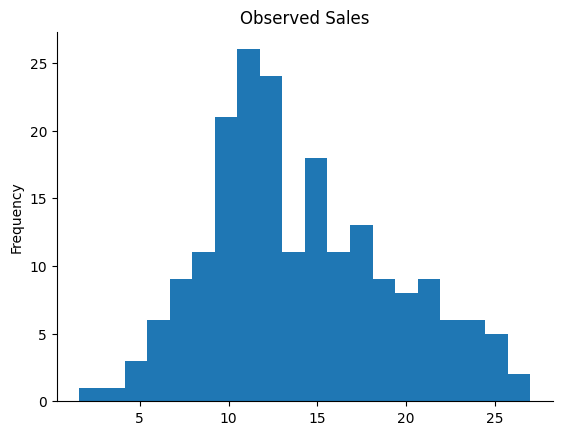

In [290]:
prediction_df['Sales'].plot(kind='hist', bins=20, title='Observed Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

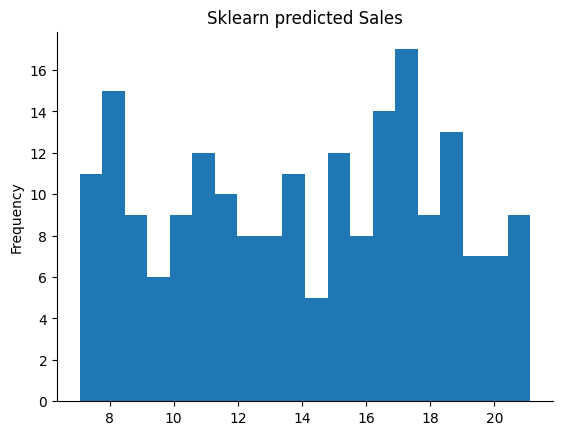

In [311]:
prediction_df['Sk_Sales'].plot(kind='hist', bins=20, title='Sklearn predicted Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

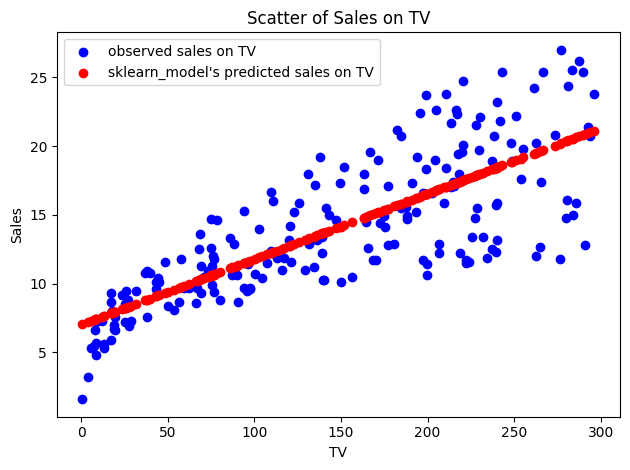

In [292]:
plt.scatter(X_np, Y_np, color='b', label = "observed sales on TV")
plt.scatter(X_np, sklearn_sales, color='r', label = "sklearn_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [293]:
X_npy = np.array(X).reshape((1,len(X)))
Y_npy = np.array(Y).reshape((1,len(Y)))


In [294]:
def layersizes(X, Y):

  n_x = X.shape[0]
  n_y = Y.shape[0]

  return n_x,n_y

n_x, n_y = layersizes(X_npy, Y_npy)
print(f"# of input layersize: {n_x}")
print(f"# of output layersize: {n_y}")


# of input layersize: 1
# of output layersize: 1


In [295]:
def initialize_parameters(n_x, n_y):

  W = np.random.rand(n_y, n_x) * 0.01
  b = np.zeros((n_y, 1))

  parameters = {"W":W,
                "b":b}

  return parameters


parameters = initialize_parameters(n_x, n_y)
print(f"weight: {parameters['W']}")
print(f"bias: {parameters['b']}")

weight: [[0.00550798]]
bias: [[0.]]


In [296]:
def forward_propagation(parameters, X):

  W = parameters["W"]
  b = parameters["b"]

  Z = np.matmul(W,X) + b
  Y_hat = Z

  return Y_hat


Y_hat = forward_propagation(parameters, X_npy)
print(f"predicated sales:{Y_hat}")

predicated sales:[[1.26738597 0.24510507 0.09473724 0.83445882 0.99584261 0.04791942
  0.31670879 0.66205908 0.04736862 1.10049421 0.36407741 1.1825631
  0.1310899  0.53702796 1.12417852 1.0762591  0.37344098 1.5499453
  0.38115215 0.81132531 1.20294262 1.30759422 0.07270532 1.25747161
  0.34314709 1.44804769 0.7870902  1.32246576 1.37038518 0.38886332
  1.61328706 0.62185083 0.53537556 1.46291923 0.52711359 1.6011695
  1.4700796  0.41144603 0.2373939  1.25581922 1.11536575 0.97491229
  1.61714264 1.13960086 0.13825027 0.96444713 0.49406572 1.32136417
  1.25141283 0.3684838  1.10049421 0.55300109 1.19192666 1.00575697
  1.44694609 1.09553703 0.04020825 0.75018674 1.16108198 1.16053118
  0.29467688 1.43923492 1.31805938 0.56566945 0.72209605 0.38005055
  0.17350134 0.76726148 1.30759422 1.19412985 1.09663862 0.6047761
  0.14761384 0.71273249 1.17540272 0.09308485 0.15146942 0.66371147
  0.02974309 0.63892557 0.4208096  1.32081337 0.41475082 0.37674577
  1.17595352 1.06414155 0.4202588  

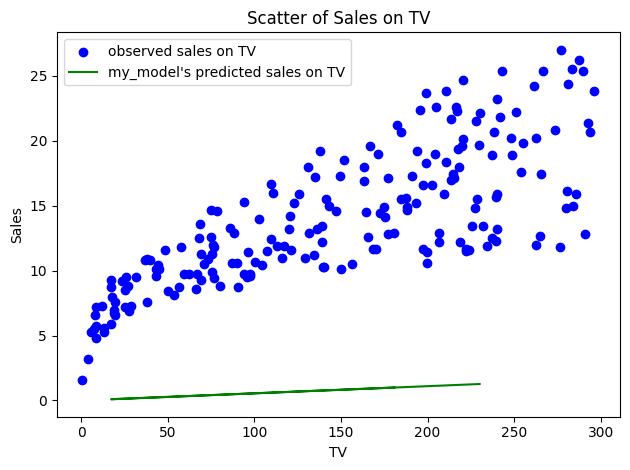

In [297]:
X_plot = X_npy[:, :5].reshape(5)
Y_plot = Y_hat[:, :5].reshape(5)



plt.scatter(X_npy, Y_npy, color='b', label = "observed sales on TV")
plt.plot(X_plot,Y_plot, color='g', label = "my_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [298]:
def cost_function(Y, Y_hat):

  n = Y.shape[1]
  error = Y - Y_hat
  cost = np.sum(error**2)/(2*n)

  return cost

cost = cost_function(Y_npy, Y_hat)
print(f"variance of predicted sales on observed sales: {cost}")

variance of predicted sales on observed sales: 99.02013683146006


In [299]:
def back_propagation(X, Y, Y_hat):

  n = Y.shape[1]
  C = Y_hat - Y
  dLdW = np.dot(C, X.T)/(2*n)
  dLdb = np.sum(C * 1)/(2*n)

  grads = {"dLdW":dLdW,
           "dLdb":dLdb}

  return grads

grads = back_propagation(X_npy, Y_npy, Y_hat)
print(f"slope of weight on cost_function: {grads['dLdW']}")
print(f"slope of bias on cost_function: {grads['dLdb']}")

slope of weight on cost_function: [[-1125.52745343]]
slope of bias on cost_function: -6.60629649705339


In [300]:
def update_parameters(parameters, grads, learning_rate):

    W = parameters["W"]
    b = parameters["b"]

    dLdW = grads["dLdW"]
    dLdb = grads["dLdb"]

    W = W - learning_rate * dLdW
    b = b - learning_rate * dLdb

    parameters = {"W": W,
                  "b": b}

    return parameters
updated_parameters = update_parameters(parameters, grads, 0.01)
print(f"updated weight: {updated_parameters['W']}")
print(f"updated bias: {updated_parameters['b']}")

updated weight: [[11.26078251]]
updated bias: [[0.06606296]]


In [301]:
def nn_model(X, Y, learning_rate=0.001, num_iterations=100, print_cost=False):

  cl = []
  wl = []
  bl = []

  n_x, n_y = layersizes(X, Y)
  parameters = initialize_parameters(n_x, n_y)

  for i in range(num_iterations):
    wl.append(parameters["W"][0,0])
    bl.append(parameters["b"][0,0])
    Y_hat = forward_propagation(parameters, X)
    cost = cost_function(Y, Y_hat)
    cl.append(cost)
    grads = back_propagation(X, Y, Y_hat)
    parameters = update_parameters(parameters, grads, learning_rate)

    if print_cost and i%10==0:
      print(f"cost after {i+1} iterations is {cost}\n")

  cache ={"cl":cl,
          "wl":wl,
          "bl":bl}

  return parameters,cache



In [302]:
my_model, cache= nn_model(X_npy, Y_npy, 0.0001, 50, False)
cl = cache["cl"]
bl = cache["bl"]
wl = cache["wl"]
print(my_model["W"])
print(my_model["b"])



[[0.08322535]]
[[0.00483823]]


In [303]:
def predict(parameters, X):

  Y_pred = forward_propagation(parameters, X)

  return Y_pred

In [304]:
Y_pred = predict(my_model, X_npy)

prediction_df["my_model sale predictions"] = Y_pred.reshape((200,))

prediction_df

,TV,Sales,Sk_Sales,my_model sale predictions
0,230.1,22.1,17.970775,19.154992
1,44.5,10.4,9.147974,3.708366
2,17.2,9.3,7.850224,1.436314
3,151.5,18.5,14.234395,12.613479
4,180.8,12.9,15.627218,15.051982
...,...,...,...,...
195,38.2,7.6,8.848493,3.184047
196,94.2,9.7,11.510545,7.844666
197,177.0,12.8,15.446579,14.735725
198,283.6,25.5,20.513985,23.607548


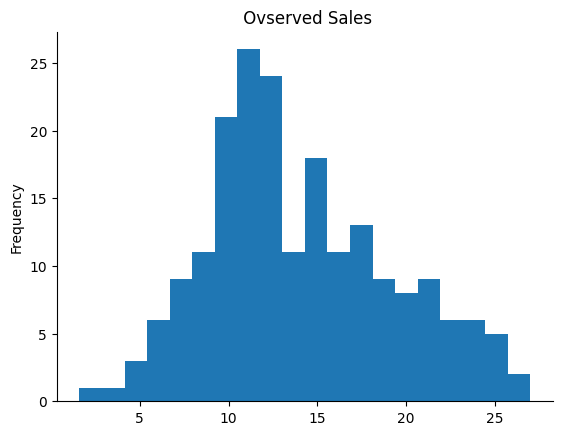

In [305]:
prediction_df['Sales'].plot(kind='hist', bins=20, title=' Ovserved Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

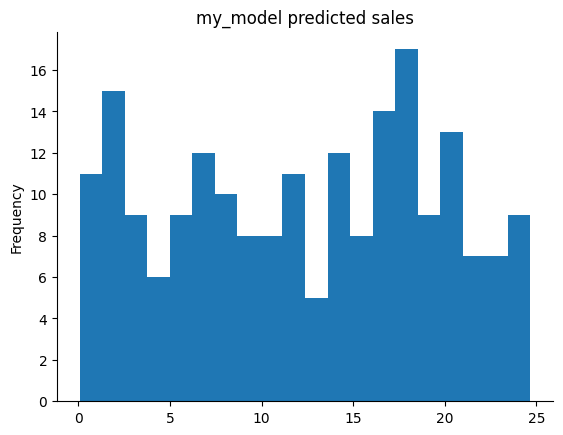

In [312]:
prediction_df['my_model sale predictions'].plot(kind='hist', bins=20, title='my_model predicted sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

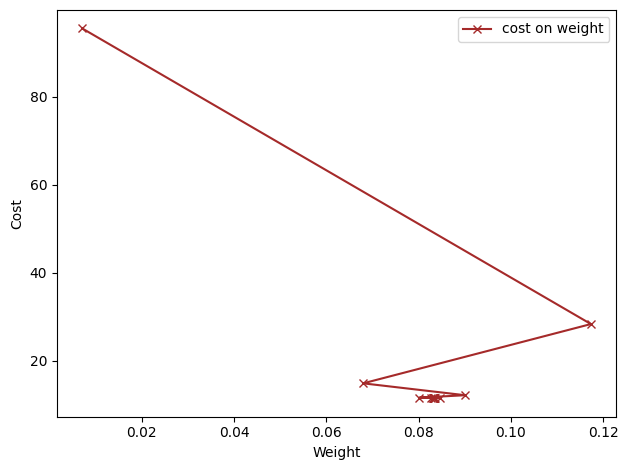

In [307]:
plt.plot(wl,cl, c='brown', marker = 'x', label='cost on weight')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()

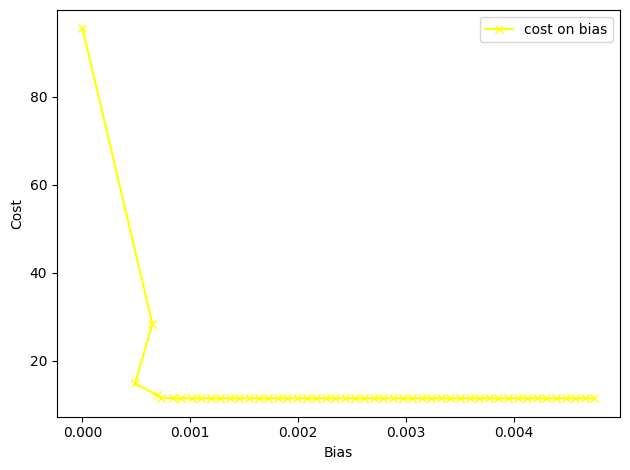

In [308]:
plt.plot(bl,cl, c='yellow', marker = 'x', label='cost on bias')
plt.xlabel('Bias')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()

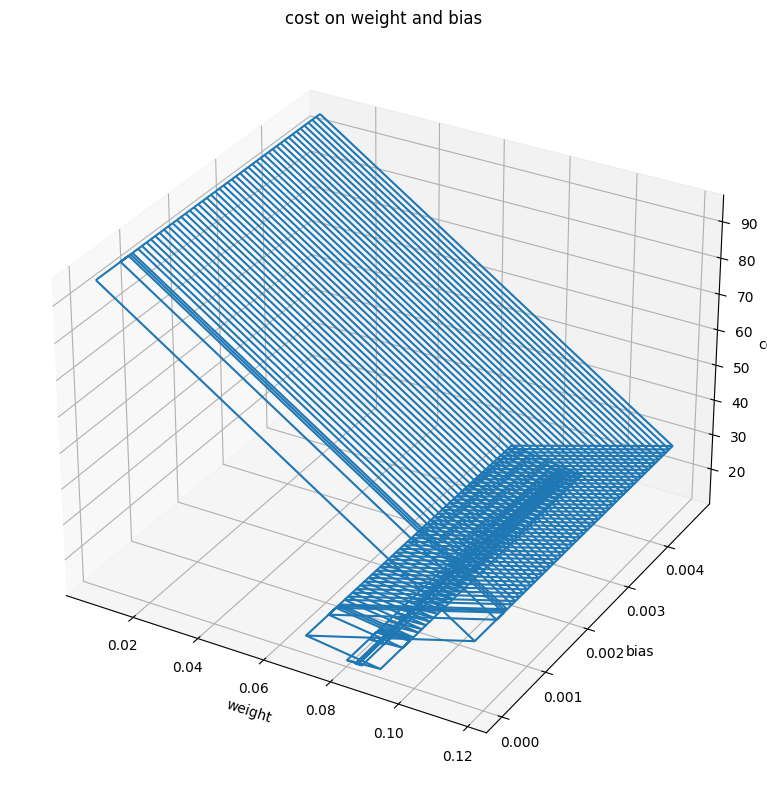

In [309]:
c = np.tile(cl, (50, 1))
w, b =np.meshgrid(wl,bl)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = "3d")
ax.plot_wireframe(w,b,c,cmap='viridis')
ax.set_title("cost on weight and bias")
ax.set_xlabel("weight")
ax.set_ylabel("bias")
ax.set_zlabel("cost")
plt.tight_layout()
plt.show()

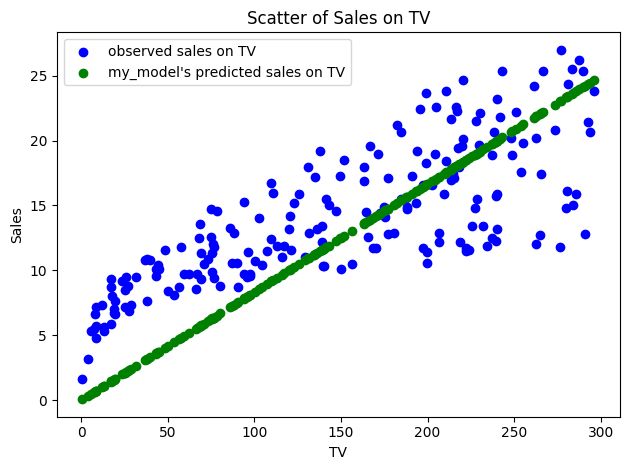

In [310]:
plt.scatter(X_np, Y_np, color='b', label = "observed sales on TV")
plt.scatter(X_npy, Y_pred, color='g', label = "my_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.tight_layout()
plt.legend()
plt.show()